# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use 2 classes (pizza & steak) using the image data modification notebook:

>**Note**: We start with a smaller dataset so we can experiment quickly and figure what works (or better yet does't work) before scaling up  

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-05-23 00:10:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.128, 74.125.31.128, 172.253.123.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   149MB/s    in 0.7s    

2022-05-23 00:10:32 (149 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

## Inspect the data (become 1 with it)

A very crucial step at the begining of any machine learning project is becoming 1 with the data.

And for a computer vision project... this usually means visualizing many samples of your data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 May 23 00:10 .
drwxr-xr-x 1 root root 4096 May 23 00:10 ..
drwxr-xr-x 4 root root 4096 May 23 00:10 test
drwxr-xr-x 4 root root 4096 May 23 00:10 train


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [2]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set up the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['1907039.jpg']
Image shape: (512, 384, 3)


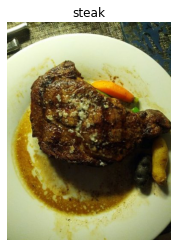

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train/", target_class="steak")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[ 90,  95,  41],
        [ 72,  77,  23],
        [ 96, 100,  49],
        ...,
        [ 33,  59,  60],
        [ 35,  61,  60],
        [ 35,  61,  58]],

       [[116, 123,  71],
        [ 95,  99,  48],
        [123, 127,  76],
        ...,
        [ 26,  52,  53],
        [ 27,  53,  52],
        [ 26,  52,  49]],

       [[138, 145,  93],
        [ 91,  95,  44],
        [102, 106,  55],
        ...,
        [ 26,  50,  50],
        [ 25,  50,  47],
        [ 25,  50,  46]],

       ...,

       [[137, 149,  99],
        [139, 151, 101],
        [142, 154, 104],
        ...,
        [ 31,  23,  12],
        [ 31,  23,  12],
        [ 30,  22,  11]],

       [[127, 139,  89],
        [133, 145,  95],
        [140, 152, 102],
        ...,
        [ 32,  24,  13],
        [ 32,  24,  13],
        [ 31,  23,  12]],

       [[114, 126,  76],
        [123, 135,  85],
        [134, 146,  96],
        ...,
        [ 33,  25,  1

In [ ]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 384, 3)

**Note** as we discussed before, many machine learning models, including neural networks ^prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images si to scale (also referred to as **normalize**) their pixel values by dividing the image arrays by 255 (since 255 is the maximum pixel value) 

In [ ]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.35294118, 0.37254902, 0.16078431],
        [0.28235294, 0.30196078, 0.09019608],
        [0.37647059, 0.39215686, 0.19215686],
        ...,
        [0.12941176, 0.23137255, 0.23529412],
        [0.1372549 , 0.23921569, 0.23529412],
        [0.1372549 , 0.23921569, 0.22745098]],

       [[0.45490196, 0.48235294, 0.27843137],
        [0.37254902, 0.38823529, 0.18823529],
        [0.48235294, 0.49803922, 0.29803922],
        ...,
        [0.10196078, 0.20392157, 0.20784314],
        [0.10588235, 0.20784314, 0.20392157],
        [0.10196078, 0.20392157, 0.19215686]],

       [[0.54117647, 0.56862745, 0.36470588],
        [0.35686275, 0.37254902, 0.17254902],
        [0.4       , 0.41568627, 0.21568627],
        ...,
        [0.10196078, 0.19607843, 0.19607843],
        [0.09803922, 0.19607843, 0.18431373],
        [0.09803922, 0.19607843, 0.18039216]],

       ...,

       [[0.5372549 , 0.58431373, 0.38823529],
        [0.54509804, 0.59215686, 0.39607843],
        [0.55686275, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed 
tf.random.set_seed(42)

# Preprocess the data (Get all the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(1./255)
valid_datagen = ImageDataGenerator(1./255)

# Set up paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from directories and turn it into batches 
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                            batch_size = 32,
                                            target_size = (224,224),
                                            class_mode = "binary",
                                            seed=42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                            batch_size = 32,
                                            target_size = (224,224),
                                            class_mode = "binary",
                                            seed=42)

# Build a CNN model (same as the tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters = 10,
                         kernel_size = 3,
                         activation = "relu",
                         input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size = 2,
                            padding = "valid"),
  tf.keras.layers.Conv2D(10, 3, activation = "relu"),
  tf.keras.layers.Conv2D(10, 3, activation = "relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation = "sigmoid")                                                           
])

# Compile our CNN
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs = 5, 
                        steps_per_epoch = len(train_data), 
                        validation_data = valid_data, 
                        validation_steps = len(valid_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


47/47 [==============================] - 12s 227ms/step - loss: 4.5320 - accuracy: 0.5253 - val_loss: 0.7092 - val_accuracy: 0.5360
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 0.5993 - accuracy: 0.6587 - val_loss: 0.6560 - val_accuracy: 0.6120
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4774 - accuracy: 0.7713 - val_loss: 0.6507 - val_accuracy: 0.6740
Epoch 4/5
47/47 [==============================] - 10s 209ms/step - loss: 0.3616 - accuracy: 0.8447 - val_loss: 0.6624 - val_accuracy: 0.6660
Epoch 5/5
47/47 [==============================] - 10s 223ms/step - loss: 0.2436 - accuracy: 0.9213 - val_loss: 0.7250 - val_accuracy: 0.7080


> **Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime -> Hardware Accelerator -> GPU (you may have to rerun some cells above)

In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

**Practice/Exercise:** Go through the CNN explainer website for a minimum of 10-minutes and compare our neural network with theirs:
https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Let's replicate the model we've built in a previous section to see if that works with the model data.

The model we're building is from the TensorFlow playground

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


47/47 [==============================] - 10s 196ms/step - loss: 32.0412 - accuracy: 0.4953 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 216ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 4)                 602116    
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_3 = tf.keras.Sequential([                               
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


47/47 [==============================] - 10s 199ms/step - loss: 506.4711 - accuracy: 0.6580 - val_loss: 61.6287 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 222.9181 - accuracy: 0.6873 - val_loss: 57.4818 - val_accuracy: 0.7560
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 173.5112 - accuracy: 0.6607 - val_loss: 105.2533 - val_accuracy: 0.7280
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 155.4687 - accuracy: 0.7007 - val_loss: 41.4691 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 9s 193ms/step - loss: 102.6555 - accuracy: 0.7107 - val_loss: 42.5213 - val_accuracy: 0.7580


In [ ]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_6 (Dense)             (None, 100)               15052900  
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


**Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in a lot of cases it is. But in this case the difference here is 2 different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural networks seeks to sort out and learn the most important patterns in an image.** So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in deciphering between different **features** in an image

In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

## Binary classification : Let's break it down

1. Become 1 with data (visualize, visualize, visualize).
2. Preprocess the data (prepare it for our model, the main step here was scaling/normalizing).
3. Created a model. (Start with baseline)
4. Fit a model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)



### 1. Becoming one with the data


['2136662.jpg']
Image shape: (512, 512, 3)
['665900.jpg']
Image shape: (384, 512, 3)


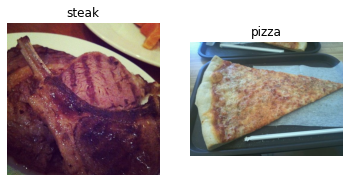

In [ ]:
# Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare if for a model)


In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches** 

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple reasons:

1. 10,000 images (or more) might not fit into the memory of your preprocessor (GPU).
2. Trying to learn the patterns in 10,000 images in 1 hit could result in the model not being able to learn very well

Why 32?

Because 32 is good for your health... (yann le cun)

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories
train_data = train_datagen.flow_from_directory(directory=train_dir, # target directory of images
                                                 target_size=(224,224), # target size of images
                                                 class_mode="binary", # type of data you're working with
                                                 batch_size=32) # size of minibatches to load data into


test_data = train_datagen.flow_from_directory(directory=test_dir,
                                                 target_size=(224,224),
                                                 class_mode="binary",
                                                 batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next() #get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
# Get the first 2 images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

### 3. Create a CNN model (start with a baseline)
A baseline is a relatively simple model or existing result that you set up when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline

> **Note** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and to see whether it works on your data and then introduce complexity as required (e.g look at which current model is performing best in the field for your problem)

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a layer convolutional neural network)

model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=(3,3), # size of the sliding window going across an input
           strides=1, # the size of the step the sliding window takes across an input
           padding="valid", # if same output shape = input shape
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10, 3, activation="relu"), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"), 
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

**Pratice:** Understand what's going on in a Conv2D layer by going through the CNN explainer website  

In [ ]:
# Compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics =["accuracy"])

In [ ]:
# Get a summary of our model
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_14 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_5 (Flatten)         (None, 475240)            0         
                                                                 
 dense_10 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model


In [ ]:
# Check the length of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))



Epoch 1/5
47/47 [==============================] - 11s 222ms/step - loss: 1.0922 - accuracy: 0.6773 - val_loss: 0.4364 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4437 - accuracy: 0.8027 - val_loss: 0.4070 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 10s 214ms/step - loss: 0.3386 - accuracy: 0.8607 - val_loss: 0.3735 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 10s 213ms/step - loss: 0.1732 - accuracy: 0.9420 - val_loss: 0.4426 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 10s 213ms/step - loss: 0.0837 - accuracy: 0.9800 - val_loss: 0.6061 - val_accuracy: 0.8040


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 148ms/step - loss: 0.7133 - accuracy: 0.5000


[0.7132630944252014, 0.5]

### Evaluating our model
It looks like our model is learning something, let's evaluate it

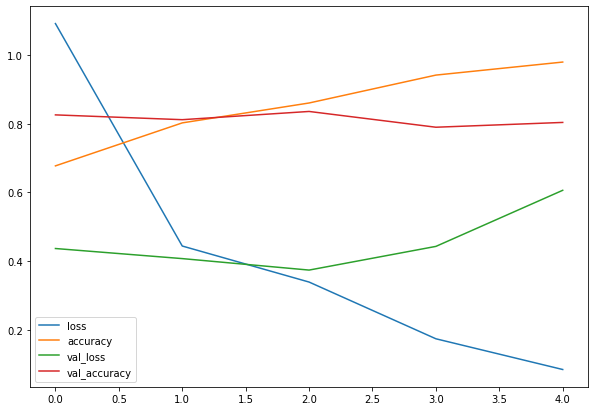

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [1]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) #how many epochs did we run for

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

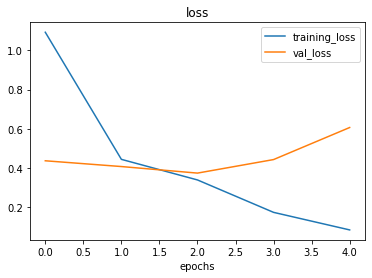

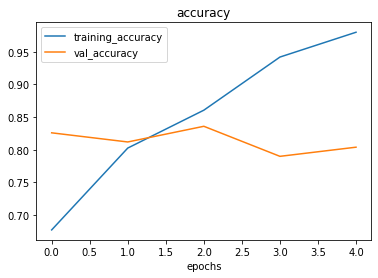

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

**Note:** When a model's **Validation loss starts to increase**, it's less likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will diminished

**Note:** Ideally the 2 loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates) when there are large differences your model may be overfitting 

### 6. Ajust the model parameters 

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by fitting overfitting a larger model
2. Reduce overfitting 

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters 
* Add another dense layer to the output of our flattened layer 

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

**Note:** reducing overfitting is known as normalization


In [ ]:
  # Create the model (this is going to be our new baseline)
  model_5 = Sequential([
      Conv2D(10, 3, activation="relu", input_shape = (224,224,3)),
      MaxPool2D(pool_size=2),
      Conv2D(10, 3, activation="relu"),
      MaxPool2D(),
      Conv2D(10, 3, activation="relu"),
      Flatten(),
      Dense(1, activation="sigmoid")
  ])

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 209ms/step - loss: 0.6462 - accuracy: 0.6373 - val_loss: 0.4578 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 0.4607 - accuracy: 0.7920 - val_loss: 0.3857 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 10s 203ms/step - loss: 0.3993 - accuracy: 0.8320 - val_loss: 0.3478 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 10s 203ms/step - loss: 0.3651 - accuracy: 0.8493 - val_loss: 0.3423 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 9s 202ms/step - loss: 0.3128 - accuracy: 0.8773 - val_loss: 0.3190 - val_accuracy: 0.8580


In [ ]:
# Get the a summary of our model with max pooling
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 flatten_6 (Flatten)         (None, 27040)            

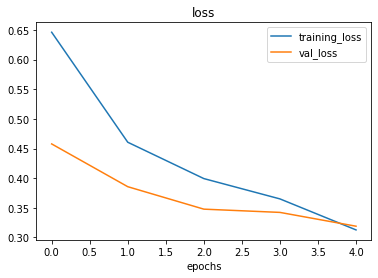

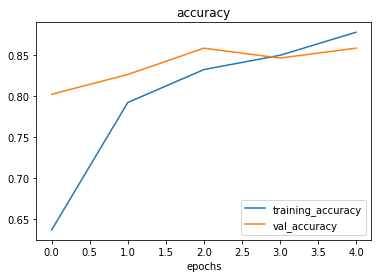

In [ ]:
plot_loss_curves(history_5)

### Opening up our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image
                                             shear_range=0.2, # how mych do you wanna shear the image
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your image around the x-axis
                                             height_shift_range=0.3, # move your image around the y-axis
                                             horizontal_flip=True) # do you wanna flip the image

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test datatest
test_datagen = ImageDataGenerator(rescale=1/255.)

>**Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar 

Let's write some code to visualize data augmentation...

In [ ]:
IMG_SIZE = (224,224)
#Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=IMG_SIZE,
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) #for demonstration purposes only

#Create non-augmented train data batches
print("Non augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False) 

print("Non augmented test data:")
#Create non-augmented test data batches
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMG_SIZE,
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False) 

Augmented training data:
Found 1500 images belonging to 2 classes.
Non augmented training data:
Found 1500 images belonging to 2 classes.
Non augmented test data:
Found 500 images belonging to 2 classes.


>**Note:** Data augmentation is usually only performed on the training data. Using  `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() 

showing image number: 16


(-0.5, 223.5, 223.5, -0.5)

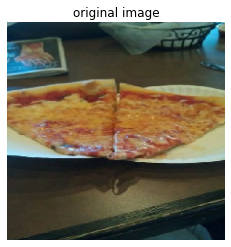

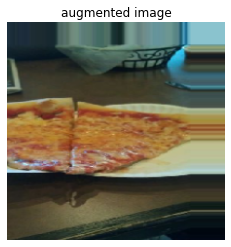

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0,32)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"augmented image")
plt.axis(False)

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [ ]:
# Create a model (same as model_5)
model_6 = Sequential([
      Conv2D(10, 3, activation="relu", input_shape = (224,224,3)),
      MaxPool2D(pool_size=2),
      Conv2D(10, 3, activation="relu"),
      MaxPool2D(),
      Conv2D(10, 3, activation="relu"),
      Flatten(),
      Dense(1, activation="sigmoid")
  ])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 519ms/step - loss: 0.7592 - accuracy: 0.4827 - val_loss: 0.6820 - val_accuracy: 0.5560
Epoch 2/5
47/47 [==============================] - 24s 511ms/step - loss: 0.6874 - accuracy: 0.5333 - val_loss: 0.6561 - val_accuracy: 0.6020
Epoch 3/5
47/47 [==============================] - 24s 510ms/step - loss: 0.7962 - accuracy: 0.5640 - val_loss: 0.6727 - val_accuracy: 0.5360
Epoch 4/5
47/47 [==============================] - 24s 508ms/step - loss: 0.7301 - accuracy: 0.4827 - val_loss: 0.6919 - val_accuracy: 0.6100
Epoch 5/5
47/47 [==============================] - 24s 514ms/step - loss: 0.6931 - accuracy: 0.4793 - val_loss: 0.6916 - val_accuracy: 0.5960


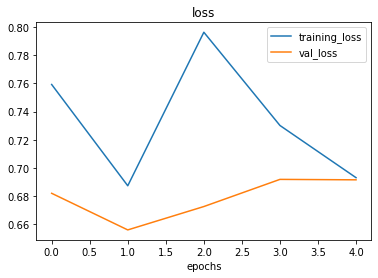

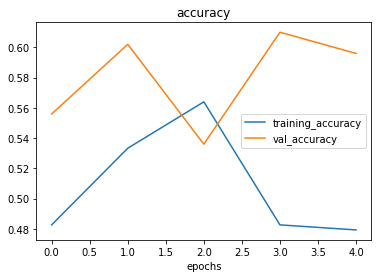

In [ ]:
# Check our model's training curves
plot_loss_curves(history_6)

Let's shuffle our augmented data and train another model (the same as before) on it and see what happens

In [ ]:
# Import data and augment it and shuffle from our training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            class_mode = "binary",
                                                                            batch_size=32,
                                                                            shuffle=True) #shuffle data this time

Found 1500 images belonging to 2 classes.


In [ ]:
# Create a model (same as model_5)
model_7 = Sequential([
      Conv2D(10, 3, activation="relu", input_shape = (224,224,3)),
      MaxPool2D(pool_size=2),
      Conv2D(10, 3, activation="relu"),
      MaxPool2D(),
      Conv2D(10, 3, activation="relu"),
      Flatten(),
      Dense(1, activation="sigmoid")
  ])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 517ms/step - loss: 0.6283 - accuracy: 0.6353 - val_loss: 0.4544 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 24s 513ms/step - loss: 0.5246 - accuracy: 0.7407 - val_loss: 0.3807 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 24s 513ms/step - loss: 0.5118 - accuracy: 0.7407 - val_loss: 0.4240 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 24s 514ms/step - loss: 0.4932 - accuracy: 0.7727 - val_loss: 0.3724 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 24s 515ms/step - loss: 0.4732 - accuracy: 0.7827 - val_loss: 0.3158 - val_accuracy: 0.8680


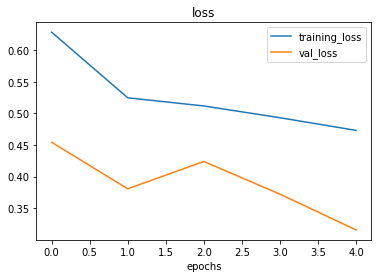

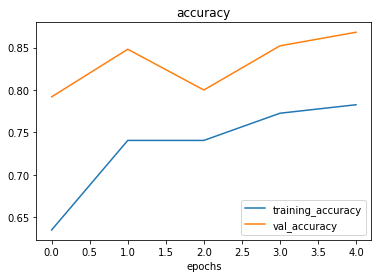

In [ ]:
# Plot loss curves 
plot_loss_curves(history_7)

> **Note:** When shuffling training data the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case pizza & steak at the same time instead of just pizza then steak)  

### Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add mode `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learnt and adjust it for our case

> **Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data

## Making a prediction with our trained on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2022-05-23 00:19:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-05-23 00:19:18 (33.1 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

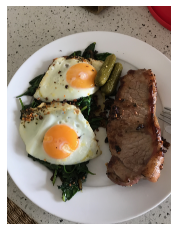

In [ ]:
# View our example image 
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")

plt.imshow(steak)
plt.axis(False)

In [ ]:
#Check the shape of our image
steak.shape

(4032, 3024, 3)

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

> **Note:** When you train a neural network and you want to make a prediction with it on your own custom data (or new data) is preprocessed into the same format as the data your model was trained on

In [30]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)

  # Decode the read file into a  tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img


In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction

In [ ]:
# Remind ourselves of our classnames 
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability and 
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [28]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at the filename, makes a prediction with model and plots the image with the predicted class as the title
  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

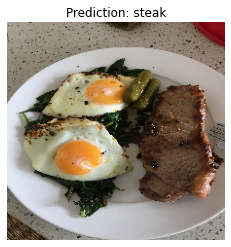

In [ ]:
# Test our model on a custom image 
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Let's try another image... this time pizza

--2022-05-23 00:19:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2022-05-23 00:19:20 (41.2 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



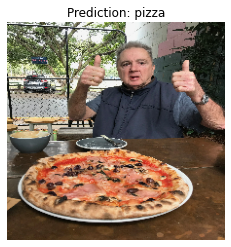

In [ ]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class image classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification)

1. Become 1 with data
2. Preprocess the data (get it ready for a model).
3. Created a model. (Start with a baseline)
4. Fit a model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline/reduce overfitting )
7. Repeat until satisfied (experiment, experiment, experiment)

## Import and become 1 with the data 

In [3]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-05-30 01:33:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   190MB/s    in 2.6s    

2022-05-30 01:33:26 (190 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [4]:
import os

# walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/test
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak
There are 10 directories and 0 images in 10_fo

In [5]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 May 30 01:33 .
drwxr-xr-x  1 root root 4096 May 30 01:33 ..
drwxr-xr-x 12 root root 4096 May 30 01:33 test
drwxr-xr-x 12 root root 4096 May 30 01:33 train


In [6]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [7]:
# let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2573191.jpg']
Image shape: (512, 512, 3)


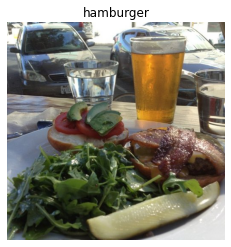

In [8]:
# Visualize visualize visualize 
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## Preprocess the data (prepare it for a model)


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale 
train_datagen = ImageDataGenerator(1/255.)
test_datagen = ImageDataGenerator(1/255.)

IMG_SIZE = (224,224)

# Load data in from directories and turn it into batches 
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size = 32,
                                               class_mode = "categorical")


test_data = train_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size = 32,
                                               class_mode = "categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with baseline)

We've been talking about the CNN explainer website... how about we just take their model (also on 10 classes) and use it for our problem...?

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model (very similar to previous models but actually the same as CNN explainer website)
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") # changed to have 10 output neurons and use the softmax activation function
])

# Compile the model
model_8.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

### 4. Fit a model

In [11]:
# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
235/235 [==============================] - 57s 196ms/step - loss: 3.3442 - accuracy: 0.1123 - val_loss: 2.3016 - val_accuracy: 0.1040
Epoch 2/5
235/235 [==============================] - 44s 185ms/step - loss: 2.2832 - accuracy: 0.1407 - val_loss: 2.2988 - val_accuracy: 0.1252
Epoch 3/5
235/235 [==============================] - 43s 185ms/step - loss: 2.2194 - accuracy: 0.1811 - val_loss: 2.2990 - val_accuracy: 0.1200
Epoch 4/5
235/235 [==============================] - 43s 184ms/step - loss: 2.0330 - accuracy: 0.2603 - val_loss: 2.4021 - val_accuracy: 0.1344
Epoch 5/5
235/235 [==============================] - 43s 184ms/step - loss: 1.7343 - accuracy: 0.3817 - val_loss: 2.5818 - val_accuracy: 0.1316


### Evaluate the model

In [12]:
# Evaluate on the test data
model_8.evaluate(test_data)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


79/79 [==============================] - 10s 130ms/step - loss: 2.5818 - accuracy: 0.1316


[2.5818135738372803, 0.1316000074148178]

In [13]:
history_8.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

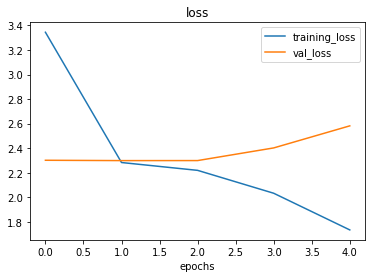

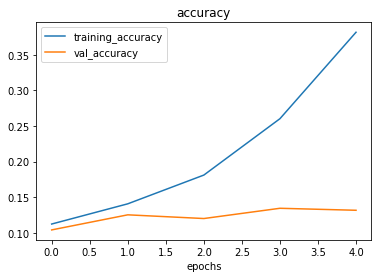

In [14]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset 

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives the model more opportunity to learn diverse patterns
* **Simplify the model** - if our current model is overfitting the data, it mamy be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original)
* **Use transfer learning** - transfer learning leverages the patterns another model has learnt on similar data to your own and allows to use those patterns on your own dataset

In [15]:
# How about we try and simplify the model first?
# Let's try to remove 2 convolutional layers
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [16]:
# fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


235/235 [==============================] - 42s 176ms/step - loss: 16.3873 - accuracy: 0.1129 - val_loss: 2.3072 - val_accuracy: 0.1076
Epoch 2/5
235/235 [==============================] - 41s 176ms/step - loss: 2.0801 - accuracy: 0.2503 - val_loss: 2.3770 - val_accuracy: 0.1272
Epoch 3/5
235/235 [==============================] - 41s 174ms/step - loss: 1.5378 - accuracy: 0.4752 - val_loss: 2.7477 - val_accuracy: 0.1348
Epoch 4/5
235/235 [==============================] - 41s 173ms/step - loss: 0.9589 - accuracy: 0.6929 - val_loss: 3.5306 - val_accuracy: 0.1408
Epoch 5/5
235/235 [==============================] - 41s 174ms/step - loss: 0.5585 - accuracy: 0.8357 - val_loss: 4.3566 - val_accuracy: 0.1440


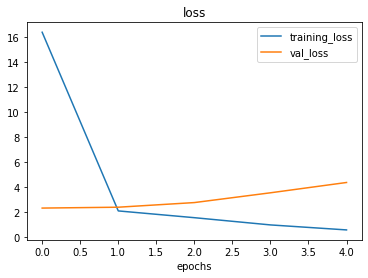

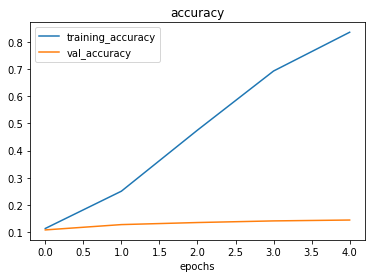

In [17]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation??

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's result by using augmented training data...

Ideally we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy



In [18]:
# Create an augmented data generator instance
train_datagen_augmented = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [19]:
# Let's create another model but this time we'll fit it on the augmented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [20]:
model_10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

In [21]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - ETA: 0s - loss: 2.1897 - accuracy: 0.2015

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


235/235 [==============================] - 109s 462ms/step - loss: 2.1897 - accuracy: 0.2015 - val_loss: 197.2529 - val_accuracy: 0.1816
Epoch 2/5
235/235 [==============================] - 109s 462ms/step - loss: 2.0510 - accuracy: 0.2779 - val_loss: 232.9137 - val_accuracy: 0.1956
Epoch 3/5
235/235 [==============================] - 108s 461ms/step - loss: 1.9976 - accuracy: 0.3009 - val_loss: 223.5531 - val_accuracy: 0.2132
Epoch 4/5
235/235 [==============================] - 109s 465ms/step - loss: 1.9538 - accuracy: 0.3196 - val_loss: 156.7504 - val_accuracy: 0.2464
Epoch 5/5
235/235 [==============================] - 108s 461ms/step - loss: 1.9397 - accuracy: 0.3275 - val_loss: 165.3183 - val_accuracy: 0.2596


In [22]:
model_8.evaluate(test_data)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


79/79 [==============================] - 11s 134ms/step - loss: 2.5818 - accuracy: 0.1316


[2.581813335418701, 0.1316000074148178]

In [23]:
model_10.evaluate(test_data)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


79/79 [==============================] - 10s 129ms/step - loss: 165.3183 - accuracy: 0.2596


[165.31829833984375, 0.2596000134944916]

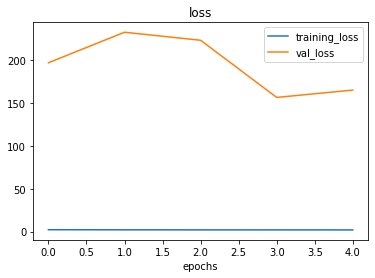

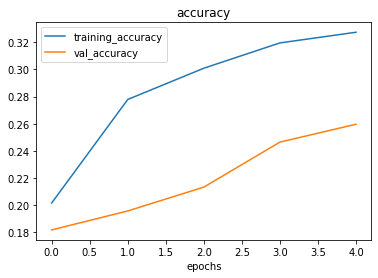

In [24]:
# Check out our model trained on augmented data's loss curve
plot_loss_curves(history_10)

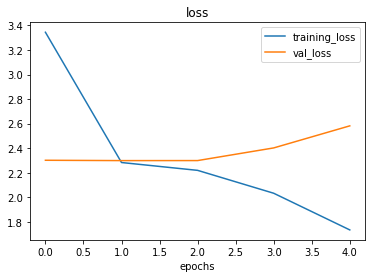

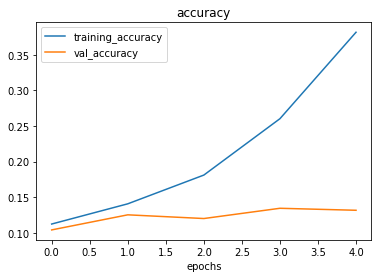

In [25]:
plot_loss_curves(history_8)

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements

### Repeat until satisfied

We could keep going on here... continually trying to bring our loss curves closer toghether and trying to improve the validation/test accuracy

How?

By running lots of experiments, namely:
- restructuring our model's architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

### Making a prediction with our trained model

Let's use our trained model to make some predictions on own custom images!

In [26]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [27]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-05-30 02:04:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-05-30 02:04:02 (218 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2022-05-30 02:04:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting 

In [38]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at the filename, makes a prediction with model and plots the image with the predicted class as the title
  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis = 0))
  
  # Add in logic for a multi-class classification
  if len(pred[0])>1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:  
    pred_class = class_names[int(tf.round(pred[0]))]


  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

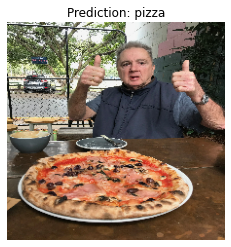

In [39]:
# Make a prediction using model 10
pred_and_plot(model=model_10, 
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

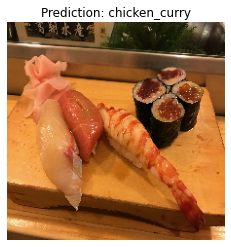

In [41]:
pred_and_plot(model=model_10, 
              filename="03-sushi.jpeg",
              class_names=class_names)

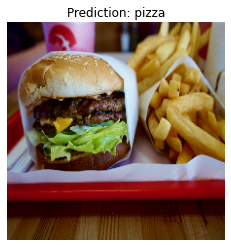

In [42]:
pred_and_plot(model=model_10, 
              filename="03-hamburger.jpeg",
              class_names=class_names)

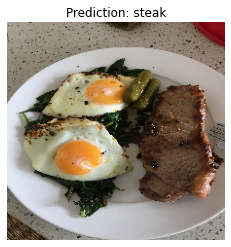

In [43]:
pred_and_plot(model=model_10, 
              filename="03-steak.jpeg",
              class_names=class_names)

## Saving and loading the model

In [44]:
# Save a model
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [45]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


79/79 [==============================] - 11s 139ms/step - loss: 165.3183 - accuracy: 0.2596


[165.3182830810547, 0.2596000134944916]

In [46]:
# Compare to the existing model
model_10.evaluate(test_data)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


79/79 [==============================] - 11s 141ms/step - loss: 165.3183 - accuracy: 0.2596


[165.31832885742188, 0.2596000134944916]